HOUSE
Gryffindor    12
Slytherin      7
Hufflepuff     1
Ravenclaw      1
Name: count, dtype: int64


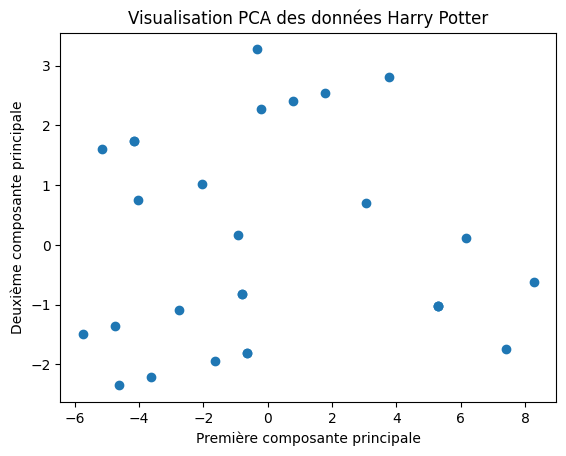

In [29]:
# import matplotlib
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
from sklearn.decomposition import PCA
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
# from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# from	sklearn	import	metrics
from sklearn.datasets import load_iris

# iris = load_iris()
# iriX = iris.data
# iriY = iris.target

data = pd.read_csv('./harry.csv')
nupy = np.array(data)
infos = nupy[:, 1:9]
names = nupy[:, 0]

# compter les occurrences de chaque maison.
house_counts = data['HOUSE'].value_counts()
print(house_counts)
# print(infos)
# print(names)

# ex : "BLOOD STATUS" et "HAIR COLOR" comme caractéristiques puis convertir en valeurs numériques.

data['BLOOD STATUS'] = pd.Categorical(data['BLOOD STATUS'])
data['BLOOD STATUS'] = data['BLOOD STATUS'].cat.codes

data['HAIR COLOR'] = pd.Categorical(data['HAIR COLOR'])
data['HAIR COLOR'] = data['HAIR COLOR'].cat.codes

# Sélectionnez les caractéristiques à inclure dans l'analyse PCA
selected_features = ['BLOOD STATUS', 'HAIR COLOR']

X = data[selected_features]

# Effectuez l'analyse PCA pour réduire les données à deux dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualisez les données en deux dimensions
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Première composante ')
plt.ylabel('Deuxième composante ')
plt.title('Visualisation PCA des données Harry Potter')
plt.show()


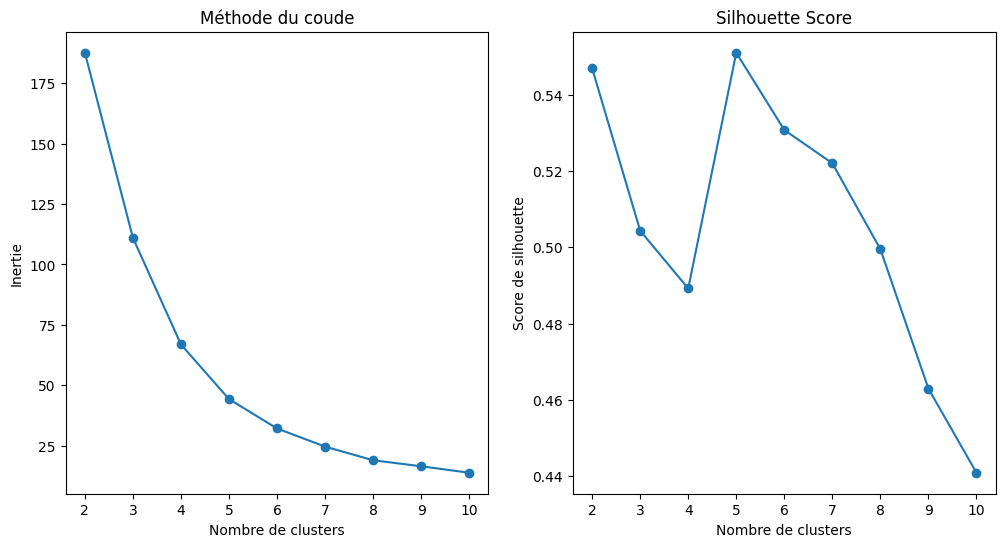

In [31]:
# Utilisez la méthode du coude pour trouver le nombre optimal de clusters
inertia = []
silhouette_scores = []
for k in range(2, 11):  # Essayez différents nombres de clusters
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    inertia.append(kmeans.inertia_)
    if k > 1:
        silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Tracez la courbe du coude pour visualiser le nombre optimal de clusters
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Méthode du coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')

# Tracez la courbe de la silhouette pour évaluer la qualité des clusters
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de silhouette')
plt.show()



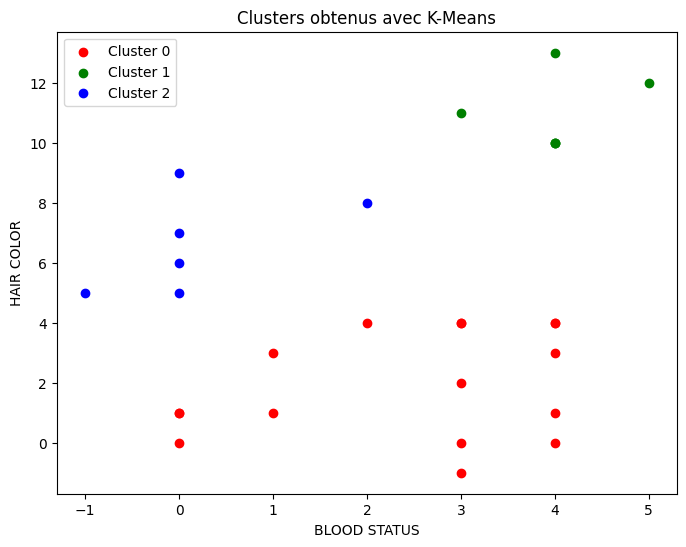

In [32]:
# le nombre optimal de clusters j'ai mis à 3, on applique K-Means avec ce nombre
optimal_n_clusters = 3 
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=0).fit(X)

# Ajoutez les labels de cluster au jeu de données
data['Cluster'] = kmeans.labels_

# Visualisez les clusters dans un diagramme de dispersion en 2D
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b']  # Couleurs pour les clusters
for i in range(optimal_n_clusters):
    cluster_data = data[data['Cluster'] == i]
    plt.scatter(cluster_data['BLOOD STATUS'], cluster_data['HAIR COLOR'], label=f'Cluster {i}', c=colors[i])

plt.xlabel('BLOOD STATUS')
plt.ylabel('HAIR COLOR')
plt.title('Clusters obtenus avec K-Means')
plt.legend()
plt.show()

In [33]:
# Calcul de l'inertie
inertia_value = kmeans.inertia_
print(f"Inertie : {inertia_value}")

# Calcul du coefficient de silhouette
silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f"Coef. de silhouette : {silhouette_avg}")


Inertie : 111.04166666666667
Coef. de silhouette : 0.5043730159704327


In [34]:
# L'objectif de l'apprentissage non supervisé et ses différences par rapport à l'apprentissage supervisé :

# Objectif de l'apprentissage non supervisé : L'objectif principal de l'apprentissage non supervisé est de découvrir des structures cachées dans les données sans avoir de labels ou d'objectifs spécifiques prédéfinis. Il est souvent utilisé pour explorer, regrouper et réduire la dimensionnalité des données. Les techniques d'apprentissage non supervisé incluent le clustering (comme K-Means), la réduction de dimension (comme PCA), et la détection d'anomalies.

# Différences par rapport à l'apprentissage supervisé :

# Dans l'apprentissage supervisé, le modèle est formé sur des données étiquetées, où les objectifs de prédiction sont connus. L'objectif est de faire des prédictions précises sur de nouvelles données. En revanche, l'apprentissage non supervisé n'utilise pas de labels pour former le modèle.
# L'apprentissage supervisé est utilisé pour la classification (prédire des catégories) et la régression (prédire des valeurs numériques). L'apprentissage non supervisé est utilisé pour la découverte de structures dans les données sans prédire une variable cible.
# Dans l'apprentissage supervisé, vous évaluez la performance du modèle en comparant ses prédictions aux vraies étiquettes, tandis qu'en apprentissage non supervisé, il n'y a généralement pas de réponse correcte à prédire, ce qui rend l'évaluation plus subjective et dépendante de l'objectif de l'analyse.
# L'apprentissage non supervisé est particulièrement utile pour explorer des données lorsque vous n'avez pas de cibles spécifiques en tête ou lorsque vous voulez découvrir des relations et des motifs cachés.

In [37]:
# Plusieurs approches peuvent être utilisées pour déterminer le nombre optimal de clusters.
# 1- Formulation mathématique 
# 2- Méthode du coude (Elbow Method) : Cette méthode consiste à tracer l'inertie 
# (somme des carrés des distances entre les points de données et le centre de leur cluster) 
# en fonction du nombre de clusters. Vous recherchez le point où l'inertie commence à diminuer 
# de manière plus lente, formant une courbe qui ressemble à un "coude". 
# Ce point est généralement considéré comme le nombre optimal de clusters.
# inertias = []
# for k in range(1, 11):  # Tester différents nombres de clusters
#     kmeans = KMeans(n_clusters=k, random_state=0)
#     kmeans.fit(X)
#     inertias.append(kmeans.inertia_)

# plt.plot(range(1, 11), inertias, marker='o')
# plt.xlabel('Nombre de clusters')
# plt.ylabel('Inertie')
# plt.title('Méthode du coude')
# plt.show()
# 3- Coefficient de silhouette (Silhouette Score) : 
# Le coefficient de silhouette mesure à quel point les données d'un cluster sont similaires entre elles 
# et à quel point elles sont différentes des autres clusters. 
# Un coefficient de silhouette proche de 1 indique que les clusters sont bien séparés, 
# tandis qu'un coefficient proche de -1 indique un mauvais regroupement.
# silhouette_scores = []
# for k in range(2, 11):
#     kmeans = KMeans(n_clusters=k, random_state=0)
#     kmeans.fit(X)
#     silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# plt.plot(range(2, 11), silhouette_scores, marker='o')
# plt.xlabel('Nombre de clusters')
# plt.ylabel('Coef. de silhouette')
# plt.title('Coefficient de silhouette')
# plt.show()
# 4- Analyse visuelle : Parfois, il est utile de visualiser les données avec différents nombres de 
# clusters et d'inspecter visuellement la qualité des clusters formés.
# Le choix du nombre optimal de clusters dépendra de vos données et de vos objectifs spécifiques.
#  Il n'y a pas de méthode unique qui fonctionne pour tous les cas, et il peut être nécessaire de 
# combiner plusieurs approches et d'utiliser votre expertise dans le domaine pour prendre la décision finale.

# 5- Critère de Dunn : Le critère de Dunn est une mesure de la qualité des clusters basée sur la 
# distance minimale entre les clusters et la distance maximale à l'intérieur des clusters. 
# Un critère de Dunn plus élevé indique une meilleure séparation entre les clusters. 
# Vous cherchez à maximiser ce critère.

# 6- Méthode de la silhouette pondérée (Weighted Silhouette Score) : 
# Cette méthode est une variante du coefficient de silhouette qui tient compte des poids associés à 
# chaque échantillon. Cela peut être utile lorsque certains échantillons sont plus importants que d'autres.

# 7- Validation croisée (Cross-Validation) : Vous pouvez diviser vos données en ensembles 
# d'entraînement et de test et évaluer la performance du modèle K-Means pour différents 
# nombres de clusters à l'aide de la validation croisée. Le nombre de clusters qui donne 
# les meilleures performances sur l'ensemble de test peut être considéré comme optimal.

# 8- Indices de validité des clusters 
# 9- Approches basées sur les données 
# 10- etc ...